In [176]:
# importy bibliotek

import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)


In [177]:
pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


In [178]:
from imblearn.over_sampling import SMOTEN

In [179]:
from sklearn.model_selection import train_test_split

### Wczytanie danych 

In [180]:
df = pd.read_csv('clean_dataset.csv')


In [181]:
df.columns

Index(['Unnamed: 0', 'basket_icon_click', 'basket_add_list',
       'basket_add_detail', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'sign_in', 'saw_checkout', 'saw_homepage',
       'ordered'],
      dtype='object')

### wyznaczenie zbioru objaśniającego (X) oraz objasnianej (y)

In [182]:
X = df.drop(labels = ['Unnamed: 0', 'ordered'], axis = 1)
y = df['ordered']

### modelowanie

In [183]:
# trenowanie 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)


In [184]:
#oversampling - SMOTE
smote = SMOTEN (random_state=123)


In [185]:
#trenowanie - SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [186]:
#sprawdzenie zbalansowania
y_train_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: ordered, dtype: float64

### Modelowanie

In [187]:
tree_clf = DecisionTreeClassifier(random_state=0) 



In [188]:
#trenowanie oraz pomiar czasu
start = time.time()
tree_clf.fit(X_train_smote, y_train_smote)
end = time.time()
print("Czas treningu modelu RandomForest: ", end - start)


Czas treningu modelu RandomForest:  1.031736135482788


In [189]:
tree_test = tree_clf.score(X_test, y_test)
tree_train = tree_clf.score(X_train_smote, y_train_smote )

print(f'Accuracy on train: {tree_train}')
print(f'Accuracy on test: {tree_test}')



Accuracy on train: 0.9920270146380222
Accuracy on test: 0.9903470325249668


In [190]:
# predykcja modelu na zbiorze testowym
y_pred = tree_clf.predict(X_test)

### Wyniki

In [191]:
class_report_DT = classification_report(y_test, y_pred, output_dict = True )
df_class_report_DT = pd.DataFrame(class_report_DT).transpose()
#df_class_report_DT.to_html('class_report_DT.html')
print(df_class_report_DT)


              precision    recall  f1-score        support
0              0.999713  0.990209  0.994938  109078.000000
1              0.816179  0.993505  0.896154    4773.000000
accuracy       0.990347  0.990347  0.990347       0.990347
macro avg      0.907946  0.991857  0.945546  113851.000000
weighted avg   0.992019  0.990347  0.990797  113851.000000


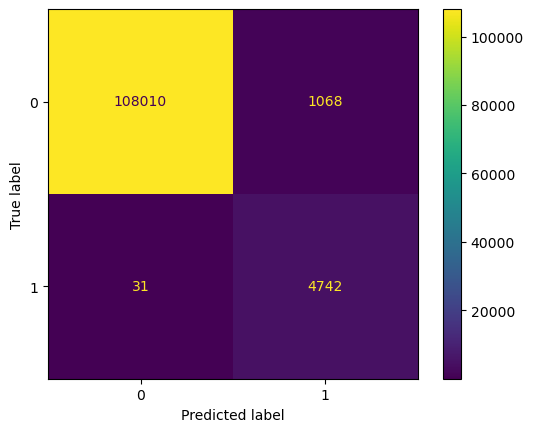

In [192]:
cm_DT = confusion_matrix(y_test, y_pred)
disp_cm_DT = ConfusionMatrixDisplay(cm_DT)
disp_cm_DT.plot();
plt.savefig('disp_cm_DT.png')